# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import metrics

from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [115]:
df.shape

(614, 13)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [117]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [118]:
df = df.dropna(how='any',axis=0).reset_index(drop=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [119]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

df['Gender'] = df['Gender'].replace({'Male':'0','Female':'1'})
df['Married'] = df['Married'].replace({'No':'0','Yes':'1'})
df['Dependents'] = df['Dependents'].replace({'3+':'3'})
df['Education'] = df['Education'].replace({'Not Graduate':'0','Graduate':'1'})
df['Self_Employed'] = df['Self_Employed'].replace({'No':'0','Yes':'1'})
df['Property_Area'] = df['Property_Area'].replace({'Rural':'0','Semiurban':'1','Urban':'2'})
df['Loan_Status'] = df['Loan_Status'].replace({'N':'0','Y':'1'})
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,0,1,1,1,0,128.0,360.0,1.0,0,0,6091.0
1,0,1,0,1,1,66.0,360.0,1.0,2,1,3000.0
2,0,1,0,0,0,120.0,360.0,1.0,2,1,4941.0
3,0,0,0,1,0,141.0,360.0,1.0,2,1,6000.0
4,0,1,2,1,1,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,0,1,0,71.0,360.0,1.0,0,1,2900.0
476,0,1,3,1,0,40.0,180.0,1.0,0,1,4106.0
477,0,1,1,1,0,253.0,360.0,1.0,2,1,8312.0
478,0,1,2,1,0,187.0,360.0,1.0,2,1,7583.0


In [120]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            480 non-null    float64
 1   Married           480 non-null    float64
 2   Dependents        480 non-null    float64
 3   Education         480 non-null    float64
 4   Self_Employed     480 non-null    float64
 5   LoanAmount        480 non-null    float64
 6   Loan_Amount_Term  480 non-null    float64
 7   Credit_History    480 non-null    float64
 8   Property_Area     480 non-null    float64
 9   Loan_Status       480 non-null    float64
 10  Income            480 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


In [121]:
X = df.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,0.0,1.0,1.0,1.0,0.0,128.0,360.0,1.0,0.0,6091.0
1,0.0,1.0,0.0,1.0,1.0,66.0,360.0,1.0,2.0,3000.0
2,0.0,1.0,0.0,0.0,0.0,120.0,360.0,1.0,2.0,4941.0
3,0.0,0.0,0.0,1.0,0.0,141.0,360.0,1.0,2.0,6000.0
4,0.0,1.0,2.0,1.0,1.0,267.0,360.0,1.0,2.0,9613.0
...,...,...,...,...,...,...,...,...,...,...
475,1.0,0.0,0.0,1.0,0.0,71.0,360.0,1.0,0.0,2900.0
476,0.0,1.0,3.0,1.0,0.0,40.0,180.0,1.0,0.0,4106.0
477,0.0,1.0,1.0,1.0,0.0,253.0,360.0,1.0,2.0,8312.0
478,0.0,1.0,2.0,1.0,0.0,187.0,360.0,1.0,2.0,7583.0


In [122]:
y = df['Loan_Status']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
475    1.0
476    1.0
477    1.0
478    1.0
479    0.0
Name: Loan_Status, Length: 480, dtype: float64

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model_pipeline = []
model_pipeline.append(DecisionTreeClassifier(random_state = 42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(LogisticRegression(random_state = 42))
model_pipeline.append(SVC(probability=True, C= 1, gamma= 0.01, kernel= 'rbf', random_state = 42))
model_pipeline.append(RandomForestClassifier(n_estimators=10, random_state = 42))
model_pipeline.append(SGDClassifier(loss = 'hinge', max_iter=1000, tol=1e-3, random_state = 42))

In [141]:
model_list = ['DT','KNN','LR','SVM','RF','SGD']
acc_list = []
auc_list = []
cm_list = []

In [142]:
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(metrics.confusion_matrix(y_test,y_pred))

In [143]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,DT,0.756944,0.69
1,KNN,0.638889,0.51
2,LR,0.805556,0.68
3,SVM,0.687500,0.50
4,RF,0.784722,0.70
5,SGD,0.694444,0.50


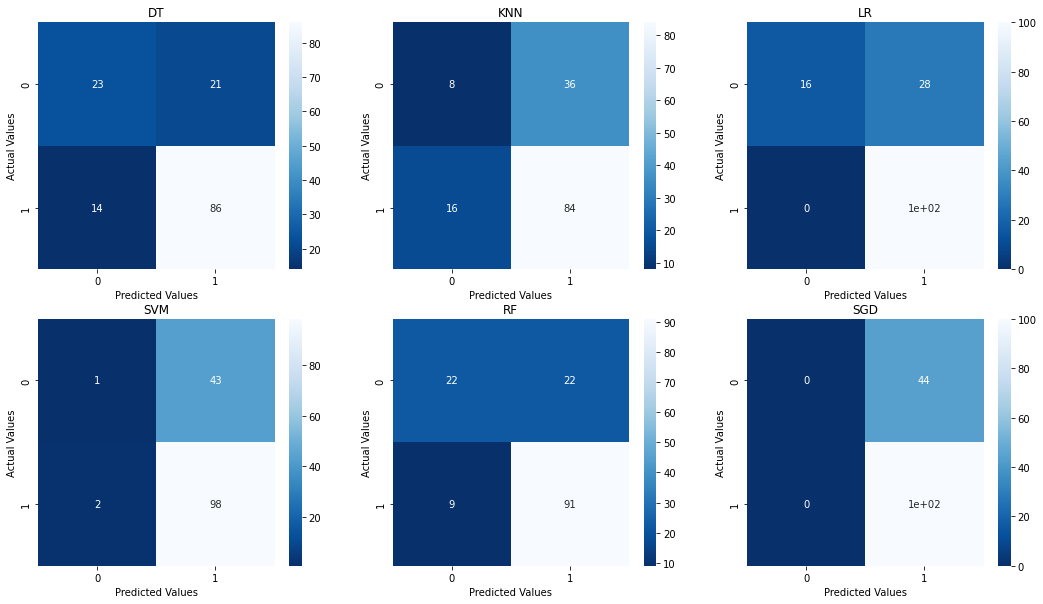

In [144]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [145]:
GridSearchCV_acc_list = []
GridSearchCV_Hyperparameters_list = []

In [146]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
grid = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, cv=5, verbose=True)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [147]:
params = dict(n_neighbors=list(range(1, 31)))
grid = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [148]:
params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(LogisticRegression(random_state = 42),params,cv=10)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

In [149]:
params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(random_state = 42), params, verbose=True, cv=5)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [150]:
params = { 
    'n_estimators': [10, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(RandomForestClassifier(random_state = 42), params, cv=5, verbose=True)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [151]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
grid = GridSearchCV(SGDClassifier(max_iter=1000, random_state = 42), params, cv=5, verbose=True)
grid.fit(X_train, y_train)
GridSearchCV_acc_list.append(round(grid.best_estimator_.score(X_test, y_test),2))
GridSearchCV_Hyperparameters_list.append(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [152]:
result_GridSearchCV = pd.DataFrame({'Model':model_list,'Accuracy':GridSearchCV_acc_list,'Hyperparameters':GridSearchCV_Hyperparameters_list})
result_GridSearchCV

,Model,Accuracy,Hyperparameters
0,DT,0.72,"DecisionTreeClassifier(ccp_alpha=0.001, max_de..."
1,KNN,0.69,KNeighborsClassifier(n_neighbors=23)
2,LR,0.81,LogisticRegression(random_state=42)
3,SVM,0.69,"SVC(C=0.1, gamma=1, random_state=42)"
4,RF,0.81,"(DecisionTreeClassifier(max_depth=6, max_featu..."
5,SGD,0.69,"SGDClassifier(penalty='l1', random_state=42)"


In [153]:
result_GridSearchCV.to_csv('table1.csv')

In [154]:
sorted_results = result_GridSearchCV.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)
sorted_results

,Model,Accuracy,Hyperparameters
0,LR,0.81,LogisticRegression(random_state=42)
1,RF,0.81,"(DecisionTreeClassifier(max_depth=6, max_featu..."
2,DT,0.72,"DecisionTreeClassifier(ccp_alpha=0.001, max_de..."
3,KNN,0.69,KNeighborsClassifier(n_neighbors=23)
4,SVM,0.69,"SVC(C=0.1, gamma=1, random_state=42)"
5,SGD,0.69,"SGDClassifier(penalty='l1', random_state=42)"


In [155]:
sorted_results.iloc[[0]]

,Model,Accuracy,Hyperparameters
0,LR,0.81,LogisticRegression(random_state=42)


In [156]:
sorted_results.iloc[[0]].to_csv('table2.csv')